***

# GTI770 - Systèmes Intelligents et Apprentissage Machine

#### Alessandro L. Koerich

### Notebook Jupyter - 5_Decision_Trees - Simpsons Dataset

##### Created: May 2018
##### Revised: Jan 2019

***

In [1]:
# Imports
import numpy as np

# to visualize the tree you must install this library
# conda install python-graphviz OR pip install graphviz
import graphviz
import pydotplus


# import from skit-learn
from sklearn import tree

In [2]:
# Load data from file
# File with 4 features extracted from Simpsons
num_features = 4
data_train = np.loadtxt("simpsons_train_4features.csv", delimiter=",")

In [3]:
# Define the training set
X_train  = data_train[:,0:num_features]
Y_train  = data_train[:,num_features]

In [6]:
X_train

array([[6.88610189e-02, 6.03634074e-01, 0.00000000e+00, 0.00000000e+00],
       [3.65637657e-02, 6.63399415e-01, 0.00000000e+00, 0.00000000e+00],
       [5.38060897e-02, 6.32868590e-01, 0.00000000e+00, 9.90384615e-03],
       ...,
       [0.00000000e+00, 4.40221530e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.00426198e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.99239039e-01, 0.00000000e+00, 6.28095181e-04]])

In [7]:
Y_train

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

### Scikit-Learn Decision Trees Documentation

#### Read the documentation about Decision Trees

http://scikit-learn.org/stable/modules/tree.html

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [8]:
# Train the Decision Tree with the training set
# There are several parameters that can be chosen.
# Here, we use the default parameters
model    = tree.DecisionTreeClassifier( criterion='entropy')
DT_model = model.fit(X_train, Y_train)

In [9]:
# Show all parameters of the model Decision Tree
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
# Here, we can set all these parameters
# You can change all of them 
# See the documentation
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

model = tree.DecisionTreeClassifier(class_weight = None,
                                    criterion = 'gini',
                                    max_depth = None,
                                    max_features = None,
                                    max_leaf_nodes = None,
                                    min_impurity_decrease = 0.0,
                                    min_impurity_split = None,
                                    min_samples_leaf  = 1,
                                    min_samples_split = 2,
                                    min_weight_fraction_leaf = 0.0,
                                    presort = False,
                                    random_state = None,
                                    splitter = 'best'
                                   )

In [11]:
# If you have trouble to visualize the decision tree, give a look at graphviz documentation
# https://graphviz.readthedocs.io/en/stable/manual.html

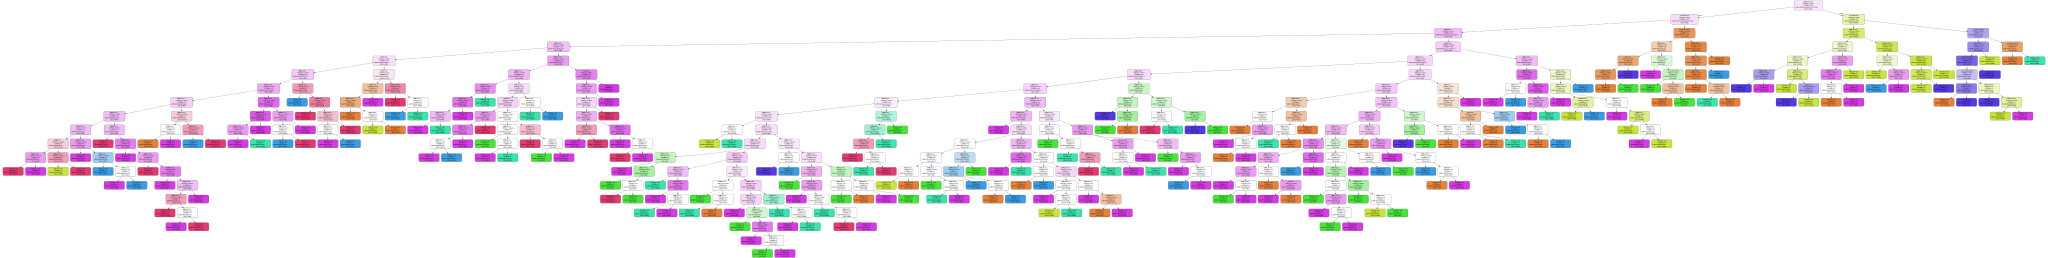

In [12]:
# Visualize the tree in jupyter and save it in a svg file
dot_data = tree.export_graphviz(DT_model,
                                out_file = None, 
                                feature_names = ['orange', 'white', 'blue', 'beige'],  
                                class_names   = ['bart', 'home', 'lisa', 'magg', 'marg', 'fami', 'othe', 'scho'],
                                filled  = True,
                                rounded = True,  
                                special_characters = True
                               )

graph = graphviz.Source(dot_data)
graph.format = 'svg'
graph.render("Simpsons_Data") 
graph 

In [13]:
# Use the model to predict the class of samples
# Notice that we are testing the train dataset. This is not far. To have a realist mesure of the performance we need to
# test our model on new data (different from the training data)
Y_train_pred = DT_model.predict( X_train )
Y_train_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [14]:
# You can also predict the probability of each class
# train dataset
Y_train_pred_prob = DT_model.predict_proba( X_train )
Y_train_pred_prob

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [15]:
# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [16]:
acc_simpsons_train = accuracy_score(Y_train, Y_train_pred )
print("Correct classification rate for the training dataset = "+str(acc_simpsons_train*100)+"%")

Correct classification rate for the training dataset = 100.0%


***
## Scikit-learn has three different APIs for evaluating the quality of a model’s predictions:

### More details in: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
***

In [17]:
from sklearn.metrics import classification_report

In [18]:
target_names = ['bart', 'home', 'lisa', 'magg', 'marg', 'fami', 'othe', 'scho']
print( classification_report(Y_train, Y_train_pred, target_names=target_names))

              precision    recall  f1-score   support

        bart       1.00      1.00      1.00        78
        home       1.00      1.00      1.00        61
        lisa       1.00      1.00      1.00        33
        magg       1.00      1.00      1.00        30
        marg       1.00      1.00      1.00        24
        fami       1.00      1.00      1.00        27
        othe       1.00      1.00      1.00       121
        scho       1.00      1.00      1.00        35

   micro avg       1.00      1.00      1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409



In [19]:
cm_simpsons_train = confusion_matrix(Y_train, Y_train_pred )
cm_simpsons_train

array([[ 78,   0,   0,   0,   0,   0,   0,   0],
       [  0,  61,   0,   0,   0,   0,   0,   0],
       [  0,   0,  33,   0,   0,   0,   0,   0],
       [  0,   0,   0,  30,   0,   0,   0,   0],
       [  0,   0,   0,   0,  24,   0,   0,   0],
       [  0,   0,   0,   0,   0,  27,   0,   0],
       [  0,   0,   0,   0,   0,   0, 121,   0],
       [  0,   0,   0,   0,   0,   0,   0,  35]])

In [20]:
import itertools
import matplotlib.pyplot as plt

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
np.set_printoptions(precision = 2)

In [23]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_simpsons_train,
                      classes = ['bart', 'home', 'lisa', 'magg', 'marg', 'fami', 'othe', 'scho'],
                      title = 'Confusion matrix, without normalization - training set')

Confusion matrix, without normalization
[[ 78   0   0   0   0   0   0   0]
 [  0  61   0   0   0   0   0   0]
 [  0   0  33   0   0   0   0   0]
 [  0   0   0  30   0   0   0   0]
 [  0   0   0   0  24   0   0   0]
 [  0   0   0   0   0  27   0   0]
 [  0   0   0   0   0   0 121   0]
 [  0   0   0   0   0   0   0  35]]


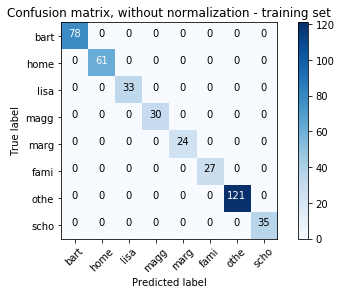

In [24]:
plt.show()

In [25]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_simpsons_train,
                      classes = ['bart', 'home', 'lisa', 'magg', 'marg', 'fami', 'othe', 'scho'],
                      normalize = True,
                      title = 'Confusion matrix, with normalization - training set')

Normalized confusion matrix
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


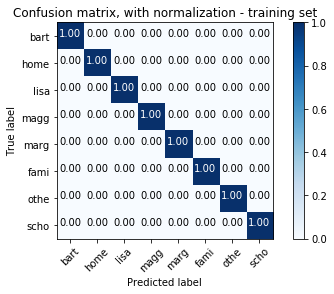

In [26]:
plt.show()

***
# Evaluation of the DT_model
## Validation dataset
***

### To Do:
#### Read the validation file: "simpsons_valid_4features.csv"

In [ ]:
######################## < FILL IN > ############################
data_valid = np.loadtxt( < FILL IN > )

### To Do:
#### Build validation set (data and labels)

In [ ]:
######################## < FILL IN > ############################
X_valid = < FILL IN >
Y_valid = < FILL IN >

### To Do:
#### Test your decision tree on the validation set

In [ ]:
######################## < FILL IN > ############################
Y_valid_pred = < FILL IN >
Y_valid_pred

### To Do:
#### Predict the probabilities for the validation dataset

In [ ]:
######################## < FILL IN > ############################
Y_valid_pred_prob = < FILL IN >
Y_valid_pred_prob

### To Do:
#### Classification rate for the validation dataset

In [ ]:
######################## < FILL IN > ############################
acc_simpsons_valid = < FILL IN >
print("Correct classification rate for the validation dataset = "+str( acc_simpsons_valid*100 )+"%")

### To Do:
#### Classification report for the validation dataset

In [ ]:
######################## < FILL IN > ############################
# Classification report
print( classification_report( < FILL IN > , < FILL IN > , target_names=target_names) )

### To Do:
#### Confusion matrix for the validation dataset

In [ ]:
######################## < FILL IN > ############################
# Confusion matrix
cm_simpsons_valid = confusion_matrix( < FILL IN >, < FILL IN > )
cm_simpsons_valid

In [ ]:
######################## < FILL IN > ############################
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(< FILL IN >,
                      classes = ['bart', 'home', 'lisa', 'magg', 'marg', 'fami', 'othe', 'scho'],
                      normalize = True,
                      title = 'Confusion matrix, with normalization - validation set')

In [ ]:
plt.show()

In [ ]:
print("Notebook ended")